This notebook is to try out different architectures of NNs

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%run 'Functions.ipynb'
from keras.callbacks import EarlyStopping, LearningRateScheduler

/home/katya/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


# 1. Training NN for a single chunk

In [83]:
min_max_scaler = MinMaxScaler()
n_iter = 100

chunk = 'S3'

data, labels, unique_mutations, aa_seq[chunk] = read_data(chunk)
scaledLabels = min_max_scaler.fit_transform(labels.reshape(-1,1))

x_train, x_valid, y_train, y_valid = train_test_split(data, scaledLabels, test_size = 0.01)

model = Sequential()
init = initializers.Orthogonal(gain=1.0, seed=None)

model.add(Dense(1, input_dim=data.shape[1], activation='sigmoid', kernel_initializer='glorot_normal'))
model.add(Dense(100, activation='sigmoid', kernel_initializer='glorot_normal'))
model.add(Dense(100, activation='sigmoid', kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))

opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer=opt,
              loss='mean_squared_error',
              verbose=0)

earlyStop = EarlyStopping(patience=100)

hist[chunk] = model.fit(x_train, y_train, validation_data=[x_valid, y_valid], 
                        epochs=n_iter, batch_size=500, shuffle=True, verbose=1,
                        callbacks=[earlyStop])

proba = model.predict_proba(data, batch_size=500, verbose=0)

weights[chunk] = model.layers[0].get_weights()[0]
biases[chunk] = model.layers[0].get_weights()[1]

true[chunk] = labels
predicted[chunk] = min_max_scaler.inverse_transform(proba)
predicted[chunk] = predicted[chunk].flatten()
fitness_potential[chunk] = data.dot(weights[chunk]) + biases[chunk]

Train on 47716 samples, validate on 482 samples
Epoch 1/100
47716/47716 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0343
Epoch 2/100
47716/47716 [==============================] - 0s - loss: 0.0282 - val_loss: 0.0195
Epoch 3/100
47716/47716 [==============================] - 0s - loss: 0.0197 - val_loss: 0.0160
Epoch 4/100
47716/47716 [==============================] - 0s - loss: 0.0168 - val_loss: 0.0163
Epoch 5/100
47716/47716 [==============================] - 0s - loss: 0.0145 - val_loss: 0.0166
Epoch 6/100
47716/47716 [==============================] - 0s - loss: 0.0129 - val_loss: 0.0130
Epoch 7/100
47716/47716 [==============================] - 0s - loss: 0.0117 - val_loss: 0.0102
Epoch 8/100
47716/47716 [==============================] - 0s - loss: 0.0108 - val_loss: 0.0090
Epoch 9/100
47716/47716 [==============================] - 0s - loss: 0.0102 - val_loss: 0.0086
Epoch 10/100
47716/47716 [==============================] - 0s - loss: 0.0097 - val_loss

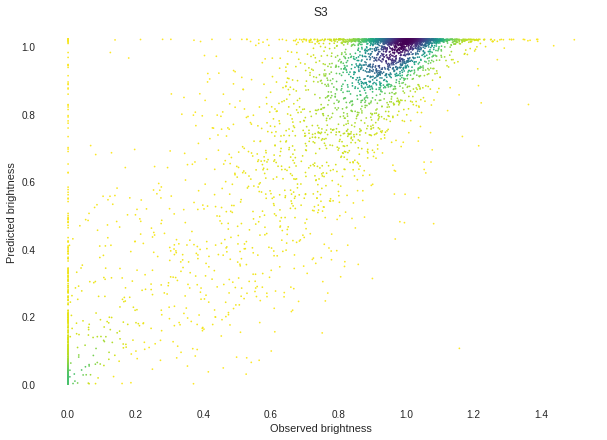

In [84]:
plt.figure(figsize = [10,7])
density_plot(true[chunk][:5000], predicted[chunk][:5000], chunk)

In [85]:
max(predicted['S3'])

1.020375

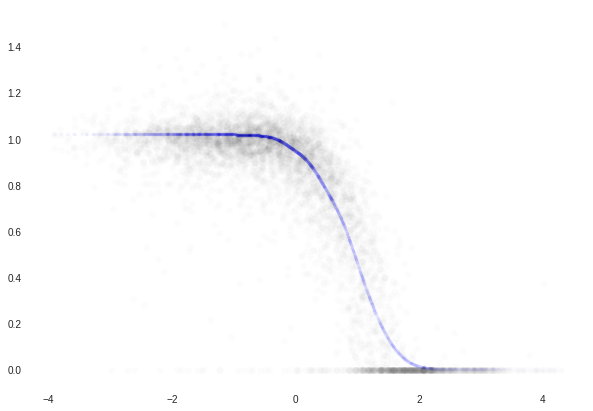

In [86]:
plt.figure(figsize = [10,7])
plt.plot(fitness_potential[chunk][:5000], true[chunk][:5000], 'ok', alpha = 0.01);
plt.plot(fitness_potential[chunk][:5000], predicted[chunk][:5000], '.b', alpha = 0.01);

In [87]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true[chunk],predicted[chunk])
r_value

0.89564064044507474

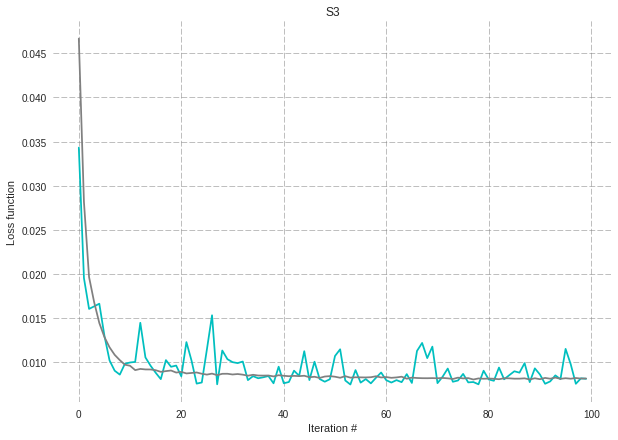

In [88]:
plt.figure(figsize=[10,7])
plt.title(chunk)
plt.plot([x for x in range(len(hist[chunk].history['loss']))], hist[chunk].history['val_loss'], 'c')
plt.plot([x for x in range(len(hist[chunk].history['loss']))], hist[chunk].history['loss'], 'gray')
plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
plt.xlabel('Iteration #')
plt.ylabel('Loss function');

***

# 2. Training all the segments with the chosen architecture

#### 2.1. Training

In [89]:
true = {}
predicted = {}
fitness_potential = {}
hist = {}
weights = {}
biases = {}
aa_seq = {}
unique_mutations = {}

In [ ]:
min_max_scaler = MinMaxScaler()
n_iter = 800

for chunk in ['S8']:
    print (chunk)
    data, labels, unique_mutations[chunk], aa_seq[chunk] = read_data(chunk)
    
    scaledLabels = min_max_scaler.fit_transform(labels.reshape(-1,1))
    
    x_train, x_valid, y_train, y_valid = train_test_split(data, scaledLabels, test_size = 0.01)
    
    model = Sequential()

    model.add(Dense(1, input_dim=data.shape[1], activation='sigmoid', kernel_initializer='glorot_normal'))
    model.add(Dense(100, activation='sigmoid', kernel_initializer='glorot_normal'))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))

    opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

    model.compile(optimizer=opt,
                  loss='mean_squared_error',
                  verbose=0)
        
    hist[chunk] = model.fit(x_train, y_train, validation_data=[x_valid, y_valid], 
                            epochs=n_iter, batch_size=500, shuffle=True, verbose=0)
    
    proba = model.predict_proba(data, batch_size=500, verbose=0)
    
    weights[chunk] = model.layers[0].get_weights()[0]
    biases[chunk] = model.layers[0].get_weights()[1]
    
    true[chunk] = labels
    predicted[chunk] = min_max_scaler.inverse_transform(proba)
    predicted[chunk] = predicted[chunk].flatten()
    fitness_potential[chunk] = data.dot(weights[chunk]) + biases[chunk]

S8


***

#### Non-scaled

In [91]:
max(labels)

1.5731477344999998

In [92]:
max(predicted[chunk])

0.95725363

#### Scaled

In [93]:
max(scaledLabels.flatten())

1.0

In [94]:
max(proba.flatten())

0.60849571

***

In [45]:
for chunk in chunks:

    _,_,R,_,_ = stats.linregress(predicted[chunk],fitness_potential[chunk].flatten())
    if R>0:
        fitness_potential[chunk]*=-1
        weights[chunk]*=-1
        
    _,_,R,_,_ = stats.linregress(predicted[chunk],fitness_potential[chunk].flatten())
    print chunk, '\t', R

S1 	-0.783291562653
S2 	-0.809948270297
S3 	-0.804230768365
S4 	-0.838888729924
S5 	-0.584802223256
S6 	-0.822176862431
S7 	-0.853736262444
S8 	-0.807888193379
S9 	-0.959049446389
S10 	-0.989707983803
S11 	-0.903350268943
S12 	-0.67582071841


#### 2.2. Plotting

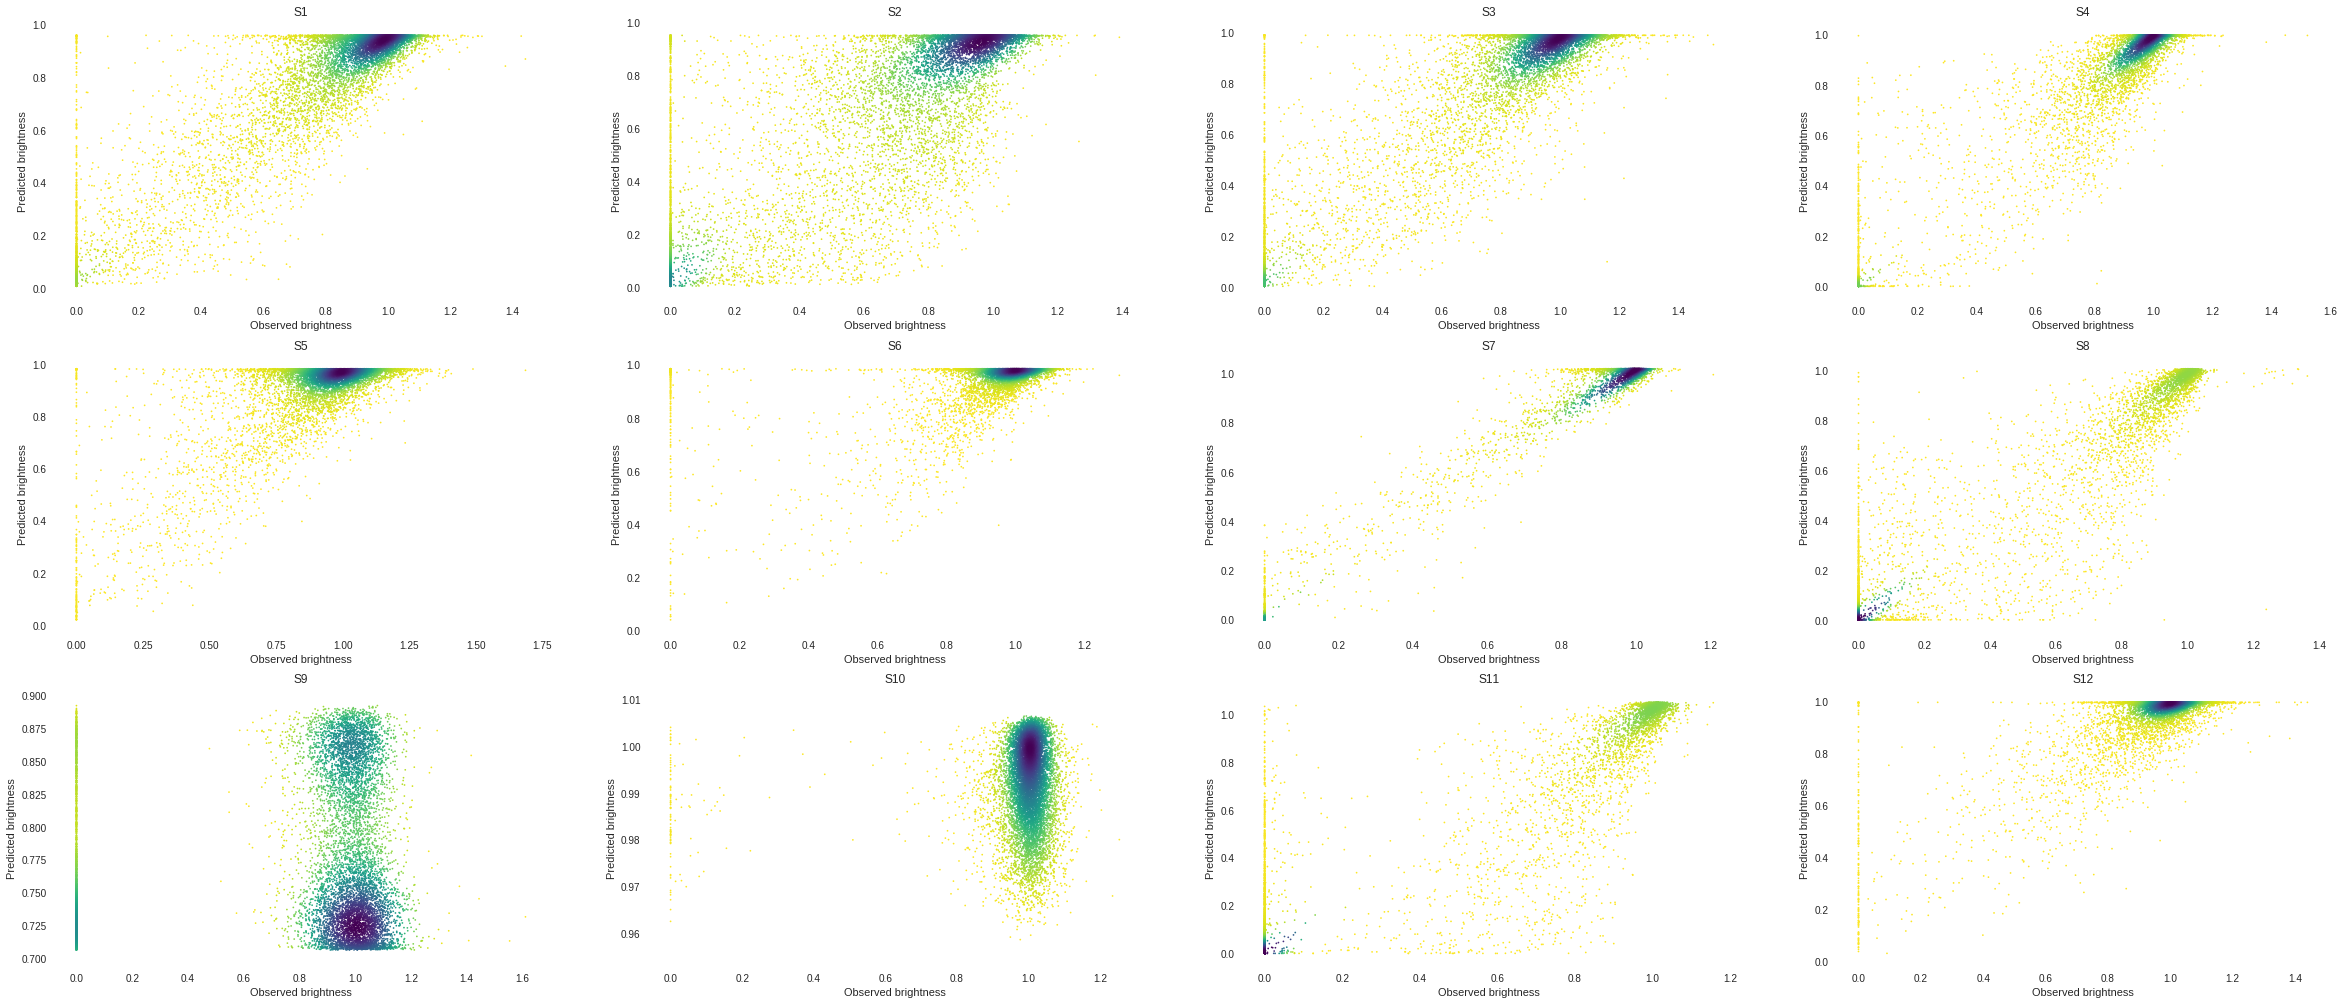

In [99]:
plt.figure(figsize=(4*5+3,3*5))
count=1
for chunk in chunks:
    plt.subplot(3,4,count)
    plt.subplots_adjust(top = 1,right=1.5)
    plt.title(chunk)
#     plt.ylim(0,1)
#     plt.xlim(0,1)
    density_plot(true[chunk][:10000], predicted[chunk][:10000], chunk)
    count+=1

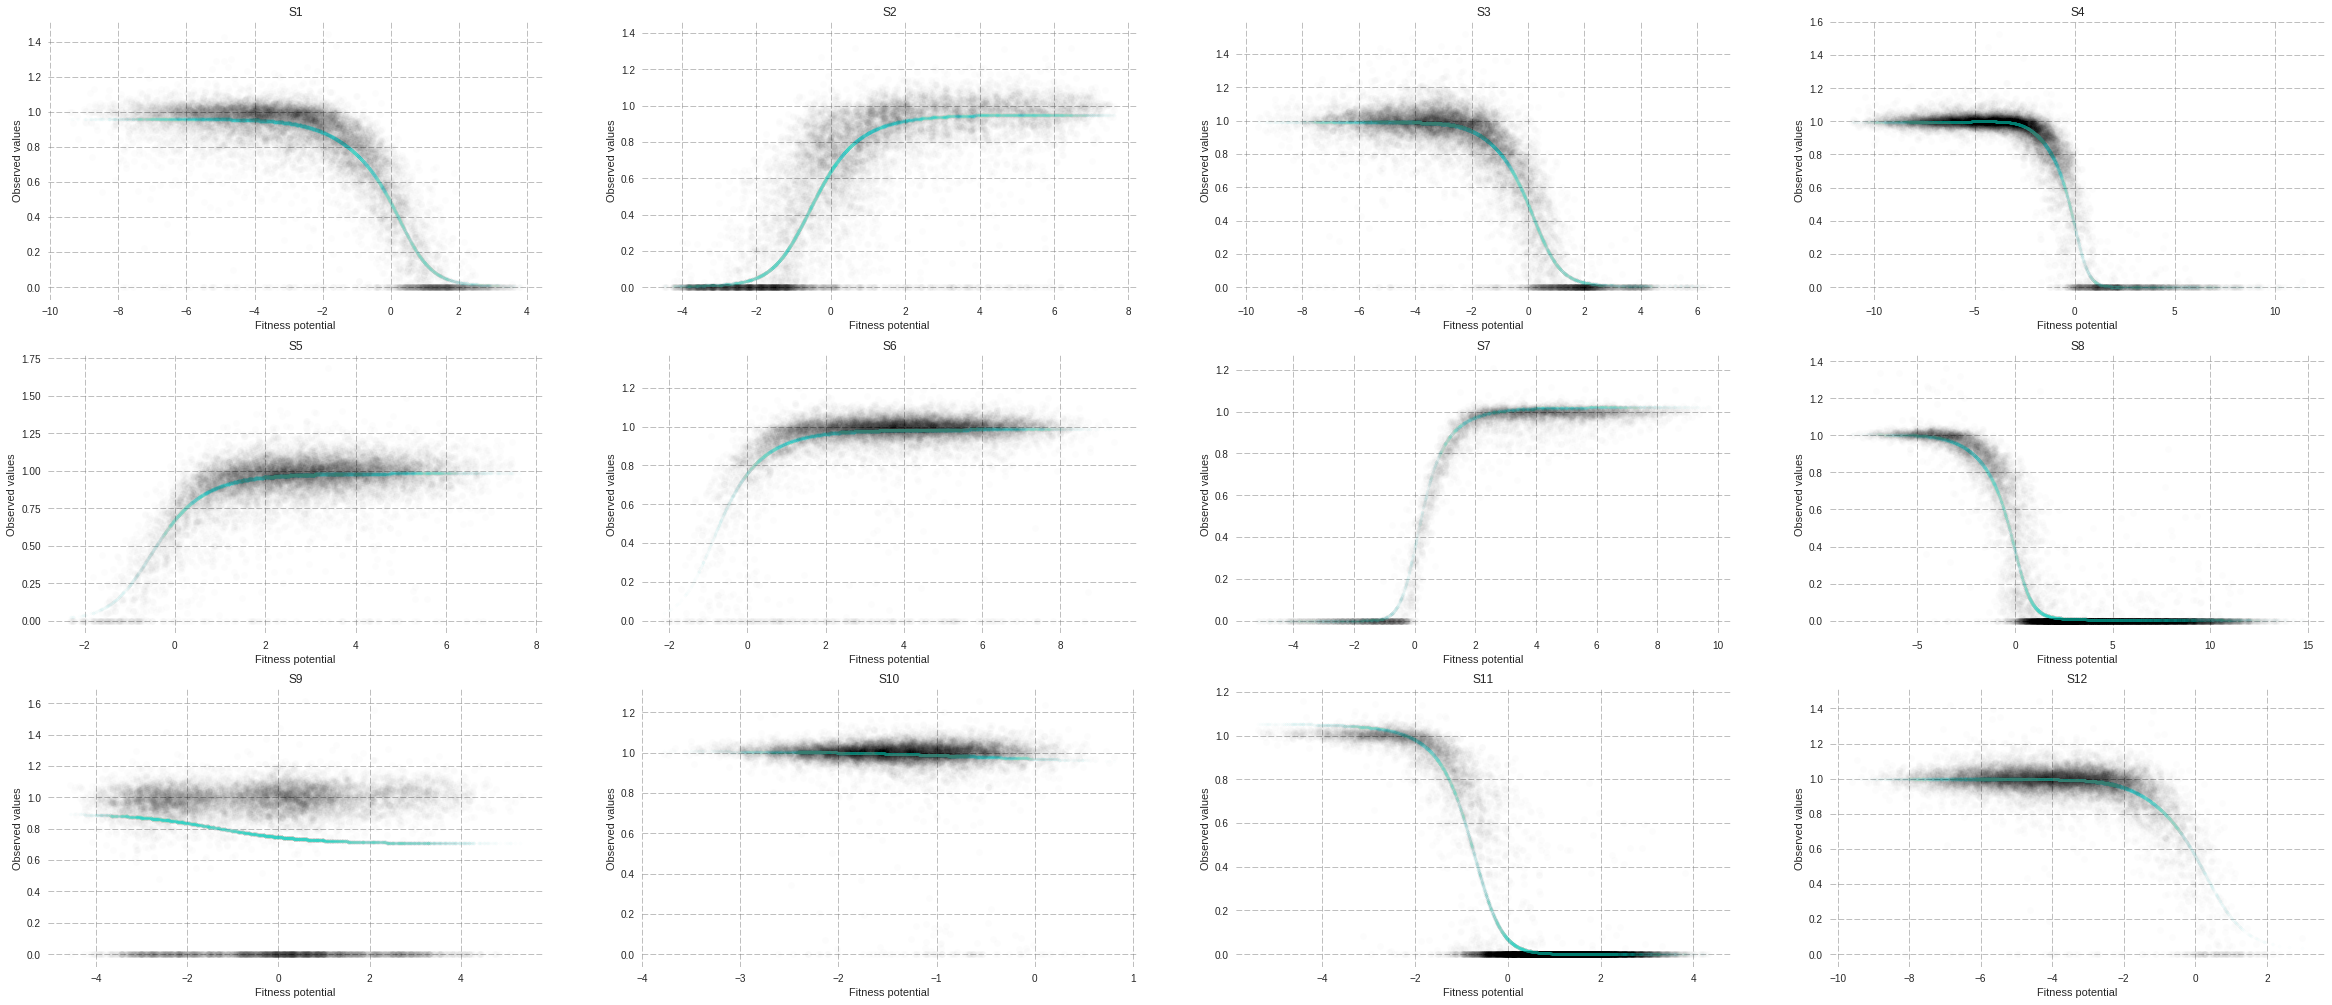

In [100]:
plt.figure(figsize=(4*5+3,3*5))
count=1
for chunk in chunks:
    plt.subplot(3,4,count)
    plt.subplots_adjust(top = 1,right=1.5)
    plt.title(chunk)
    X = fitness_potential[chunk][:10000]
    Y = true[chunk][:10000]
    plt.plot(X, Y, 'ok', alpha = 0.01)
    plt.plot(X, predicted[chunk][:10000], '.', c='#36D1C4', alpha = 0.01)
    plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
    plt.xlabel('Fitness potential')
    plt.ylabel('Observed values')
    count+=1

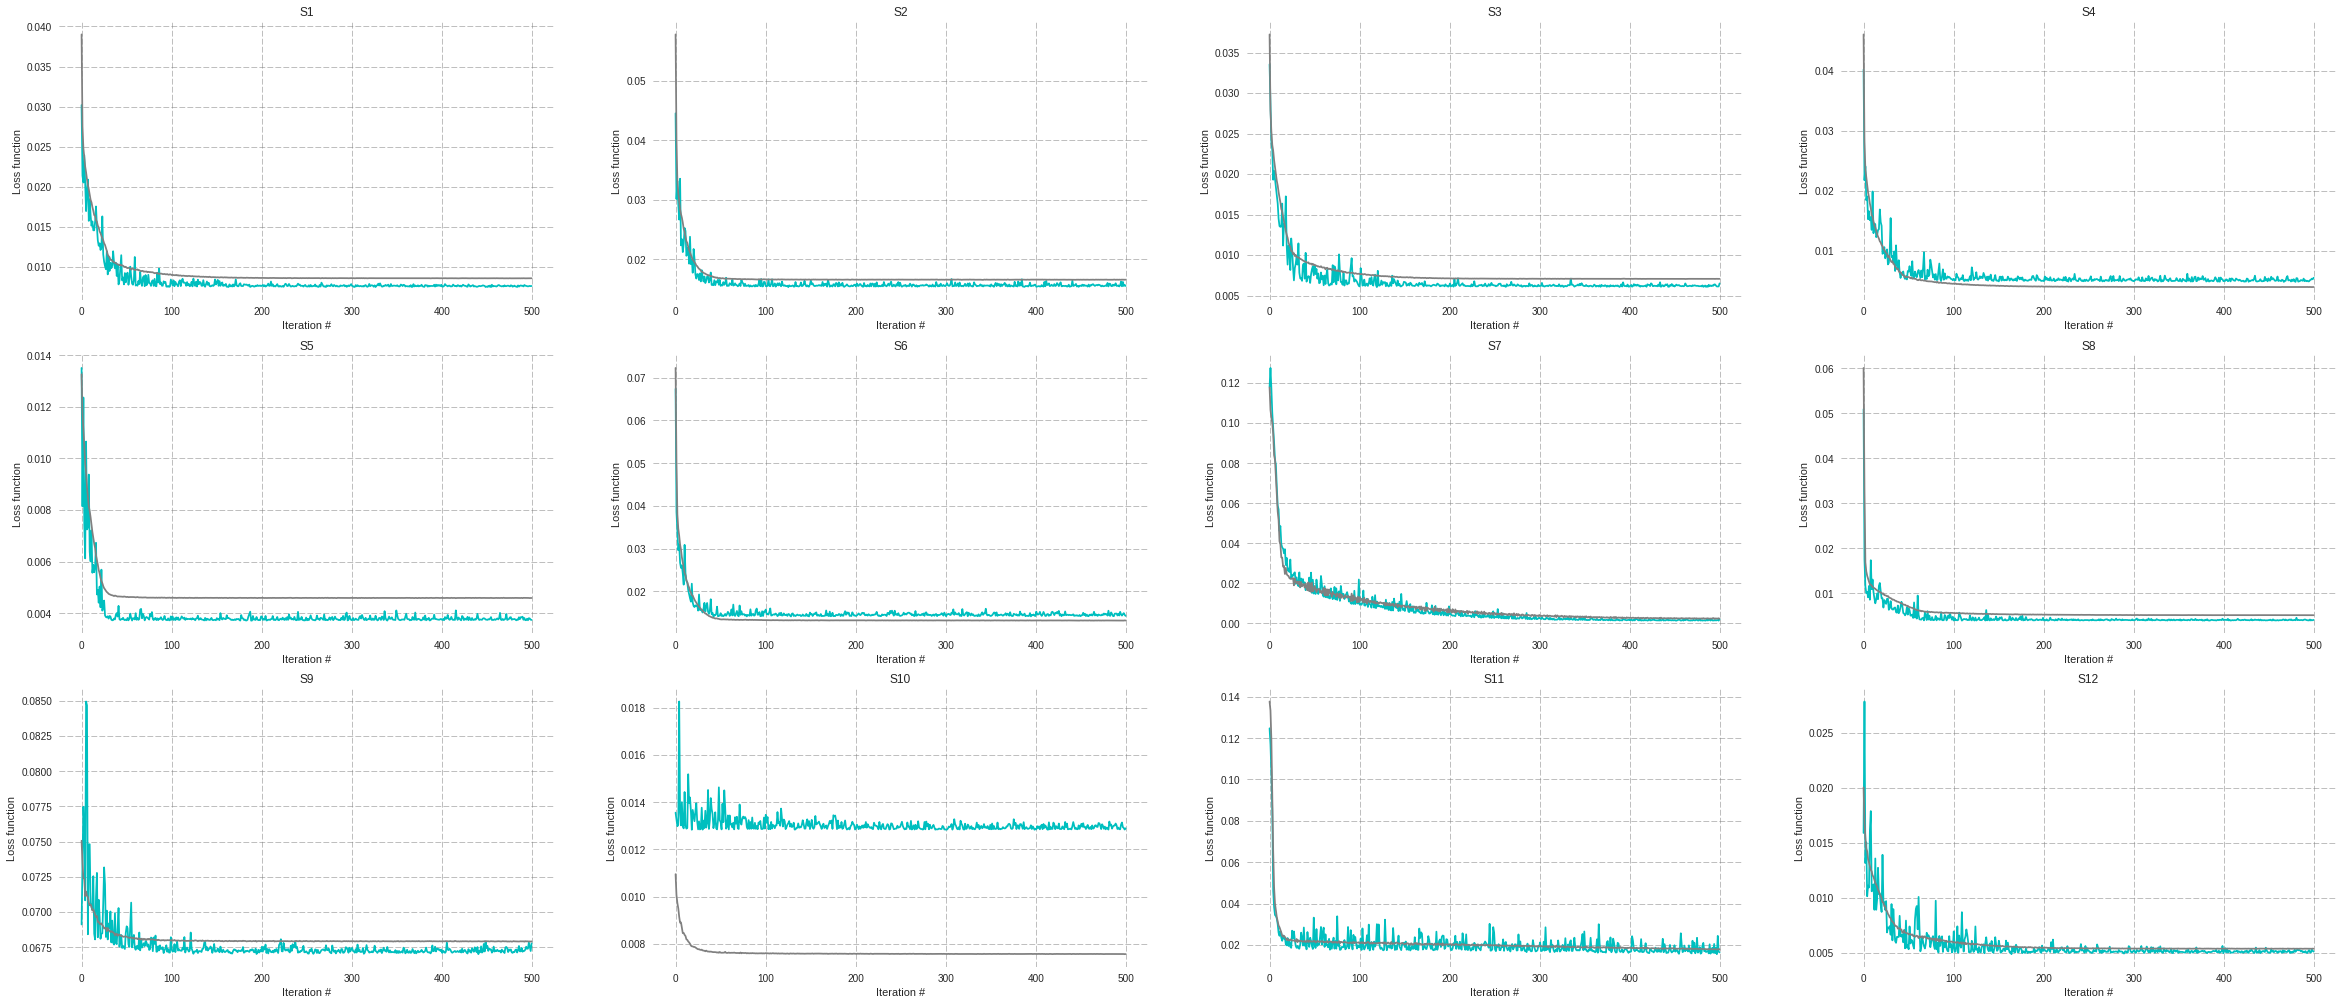

In [101]:
plt.figure(figsize=(4*5+3,3*5))
count=1
for chunk in chunks:
    plt.subplot(3,4,count)
    plt.subplots_adjust(top = 1,right=1.5)
    plt.title(chunk)
    plt.plot([x for x in range(len(hist[chunk].history['val_loss']))], hist[chunk].history['val_loss'], 'c')
    plt.plot([x for x in range(len(hist[chunk].history['val_loss']))], hist[chunk].history['loss'], 'gray')
    plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
    plt.xlabel('Iteration #')
    plt.ylabel('Loss function')
    count+=1

#### 2.3. Extracting residuals

In [270]:
residualsDF = {}

for chunk in chunks:
    residualsDF[chunk] = pd.DataFrame(predicted[chunk] - true[chunk], index = aa_seq[chunk])
    residualsDF[chunk]['fitnessPotential'] = fitness_potential[chunk]
    residualsDF[chunk]['observed'] = true[chunk]
    residualsDF[chunk].columns = ['predictedMinusObserved', 'fitnessPotential', 'observed']
    residualsDF[chunk].to_csv('../residuals/' + chunk + '.csv', sep=',')

#### 2.4. Extracting weights

In [42]:
weightsDF = {}

for chunk in chunks:
    weightsDF[chunk] = pd.DataFrame(weights[chunk], index = unique_mutations[chunk])

# 3. Checking correlations and loss function

### 3.1. Correlations prediction vs observed + Lucas's values

In [43]:
r_values = []

for chunk in chunks:
    y = true[chunk]
    y_pred = predicted[chunk]
    slope, intercept, r_value, p_value, std_err = stats.linregress(y,y_pred)
    r_values.append(r_value)
    
lucas = [0.76386, 0.62877, 0.80256, 0.91289, 0.49342, 0.15075, 0.97532, 0.88078, 0.01069, 0.0096183, 0.81741, 0.54172]

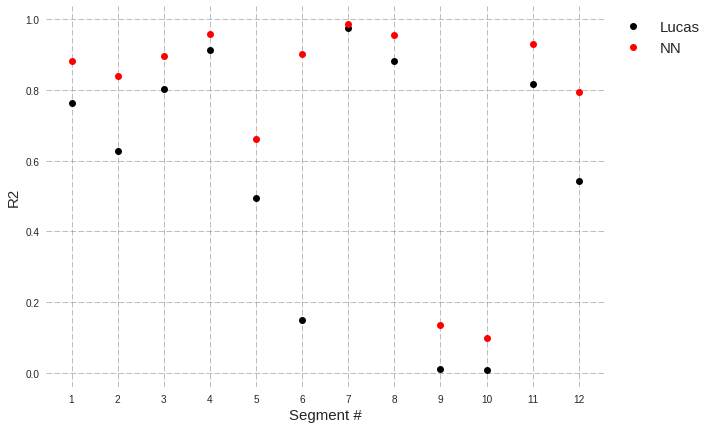

In [44]:
plt.figure(figsize=[10,7])
plt.plot([x for x in range(1, 13)], lucas, 'ok', label='Lucas')
plt.plot([x for x in range(1, 13)], r_values, 'or', label='NN')
plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
plt.xlabel('Segment #', fontsize=15)
plt.legend(fontsize=15, bbox_to_anchor=(1, 1))
plt.ylabel('R2', fontsize=15)
plt.xticks([x for x in range(1,13)]);

### 3.2. Mean Squared Error

In [11]:
mse = []

for chunk in chunks:
    mse.append(hist[chunk].history['loss'][-1])

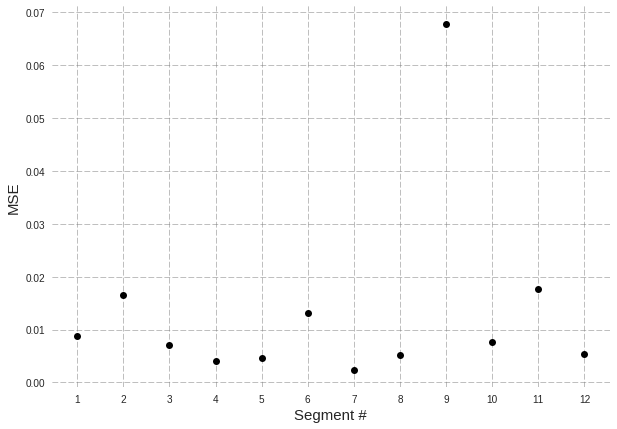

In [276]:
plt.figure(figsize=[10,7])
plt.plot([x for x in range(1, 13)], mse, 'ok')
plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
plt.xlabel('Segment #', fontsize=15)
plt.ylabel('MSE', fontsize=15)
plt.xticks([x for x in range(1,13)]);

# 4. Crossvalidation

### 4.1. Comparing train and test sets accuracy predictions

In [ ]:
test_r2 = {}
train_r2 = {}

for chunk in chunks:
    print (chunk)
    data, labels = read_data(chunk)
    
    cv = cross_validation.StratifiedKFold(labels, n_folds = 10, shuffle = True)

    test_r2[chunk] = []
    train_r2[chunk] = []

    for train_idx, test_idx in cv:
        X_train, y_train = data[train_idx,:], labels[train_idx]
        X_test, y_test = data[test_idx,:],labels[test_idx]

        model = Sequential()
        init = initializers.Orthogonal(gain=1.0, seed=None)

        model.add(Dense(1, input_dim=data.shape[1], activation='sigmoid', kernel_initializer=init))
        model.add(Dense(100, activation='sigmoid', kernel_initializer=init))
        model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

        opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

        model.compile(optimizer=opt,
                      loss='mean_squared_error',
                      verbose=0)

        model.fit(X_train, y_train, epochs=100, batch_size=500, shuffle=True, verbose=0)
        proba_train = model.predict_proba(X_train, batch_size=500, verbose=0)
        proba_test = model.predict_proba(X_test, batch_size=500, verbose=0)

        predicted_train = proba_train.flatten()
        predicted_test = proba_test.flatten()

        _, _, Rtrain, _, _ = stats.linregress(y_train, predicted_train)
        _, _, Rtest, _, _ = stats.linregress(y_test, predicted_test)

        test_r2[chunk].append(Rtest)
        train_r2[chunk].append(Rtrain)

S1


In [180]:
train_r2['S5']

[0.60423015365282018,
 0.0,
 -0.00039742165628629421,
 0.6018810801083414,
 0.60497792503494985,
 -0.0018418963715206196,
 0.60649436280492008,
 0.60024094578788734,
 -0.00057688693933001848,
 0.60018624848174496]

KeyError: 'S1'

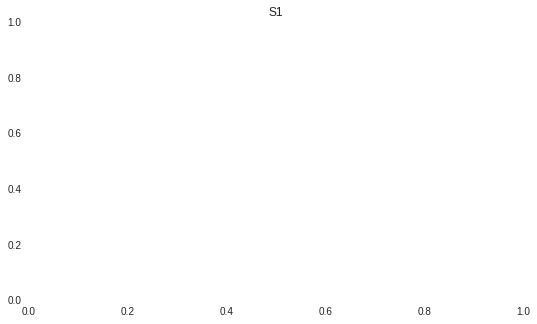

In [179]:
plt.figure(figsize=(4*5+3,3*5))
count=1
for chunk in chunks:
    plt.subplot(3,4,count)
    plt.subplots_adjust(top = 1,right=1.5)
    plt.title(chunk)
    plt.boxplot([train_r2[chunk], test_r2[chunk]], labels=['Train set', 'Test set'])
    plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
    plt.ylabel('R2')
    plt.ylim(0,1)
    count+=1

### 4.2. Checking accuracy dependence from the test set size

In [171]:
from sklearn.model_selection import train_test_split
nfold=10
data, labels = read_data(chunk)

for size in [0.1, 0.05, 0.01, 0.001, 0]:
    print (size)
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=size)

    cv = cross_validation.KFold(labels.shape[0], n_folds = nfold, shuffle = True)

    model = Sequential()
    init = initializers.Orthogonal(gain=1.0, seed=None)

    model.add(Dense(1, input_dim=data.shape[1], activation='sigmoid', kernel_initializer=init))
    model.add(Dense(100, activation='sigmoid', kernel_initializer=init))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

    opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

    model.compile(optimizer=opt,
                  loss='mean_squared_error',
                  verbose=0)

    model.fit(X_train, y_train, epochs=500, batch_size=500, shuffle=True, verbose=0)
    proba_train = model.predict_proba(X_train, batch_size=500, verbose=0)

    predicted_train = proba_train.flatten()
    _, _, Rtrain, _, _ = stats.linregress(y_train, predicted_train)

    if size != 0:
        proba_test = model.predict_proba(X_test, batch_size=500, verbose=0)
        predicted_test = proba_test.flatten()
        _, _, Rtest, _, _ = stats.linregress(y_test, predicted_test)
        print (Rtest)
        
    print (Rtrain)

0.05


KeyboardInterrupt: 

In [ ]:
x = [0.1, 0.05, 0.01, 0.001, 0]
test = Rtest
train = Rtrain

plt.figure(figsize=[10,3])
plt.plot(x, train, 'ok', alpha = 0.7, markersize=5, label='train')
plt.plot(x[:-1], test, 'om', alpha = 0.7, markersize=5, label='test')
plt.grid(True, ls='--', lw=0.5, dash_capstyle='round', c='gray')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.ylim(0,1)
plt.xlim(-0.005,0.105)
plt.xticks([i for i in np.arange(0,0.11,0.01)])
plt.xlabel('Test set fraction', fontsize=10)
plt.ylabel('R2', fontsize=10)
plt.legend(fontsize=10, bbox_to_anchor=(1, 1), loc='left')
x = [-1, 1]
plt.plot(x, [0.9 for i in x], ':k', lw=0.7);